In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Predicting the house price using Linear Regression statistical Algorithm
dataset=pd.read_csv('Real estate.csv',index_col=0)

In [3]:
dataset.shape

(414, 7)

In [4]:
dataset.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
dataset.rename(columns={"X1 transaction date":'X1_Transaction_Date', 
                        "X2 house age":'X2_House_Age',
                        "X3 distance to the nearest MRT station":'X3_Distance_From_Mrt_Station',
                        "X4 number of convenience stores":'X4_No_Convenience_Stores',
                        "X5 latitude":'X5_Latitude',
                        "X6 longitude":'X6_Longitude',
                        "Y house price of unit area":'Y_House_Price_Per_Unit'},inplace=True)
dataset.head(2)

,X1_Transaction_Date,X2_House_Age,X3_Distance_From_Mrt_Station,X4_No_Convenience_Stores,X5_Latitude,X6_Longitude,Y_House_Price_Per_Unit
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   X1_Transaction_Date           414 non-null    float64
 1   X2_House_Age                  414 non-null    float64
 2   X3_Distance_From_Mrt_Station  414 non-null    float64
 3   X4_No_Convenience_Stores      414 non-null    int64  
 4   X5_Latitude                   414 non-null    float64
 5   X6_Longitude                  414 non-null    float64
 6   Y_House_Price_Per_Unit        414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [7]:
dataset.describe()

,X1_Transaction_Date,X2_House_Age,X3_Distance_From_Mrt_Station,X4_No_Convenience_Stores,X5_Latitude,X6_Longitude,Y_House_Price_Per_Unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [8]:
dataset.isna().sum()

X1_Transaction_Date             0
X2_House_Age                    0
X3_Distance_From_Mrt_Station    0
X4_No_Convenience_Stores        0
X5_Latitude                     0
X6_Longitude                    0
Y_House_Price_Per_Unit          0
dtype: int64

/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y_House_Price_Per_Unit', ylabel='Density'>

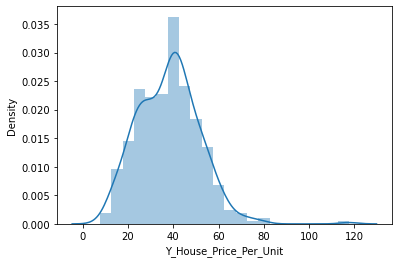

In [9]:
sns.distplot(dataset.Y_House_Price_Per_Unit)

/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


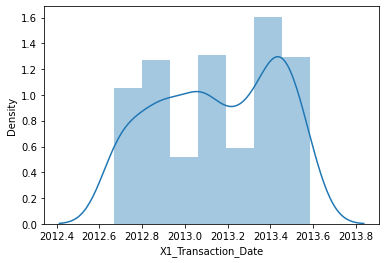

/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


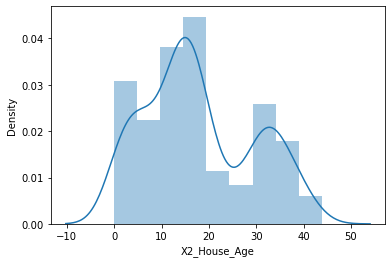

/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


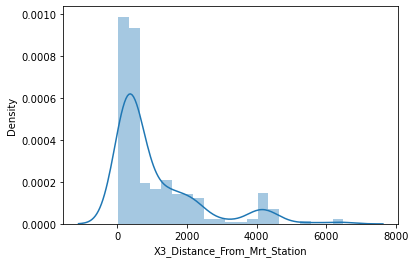

/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


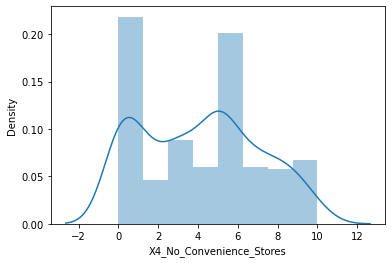

/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


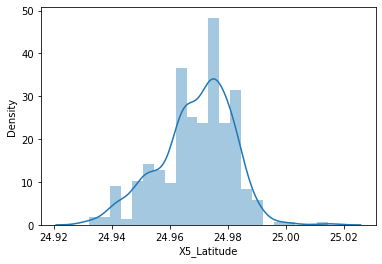

/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


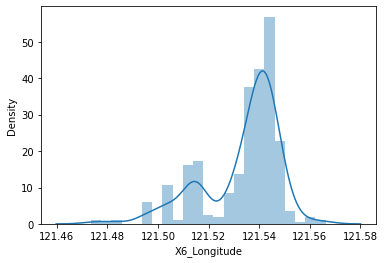

In [10]:
# for col in range(len(dataset.columns)-1):
sns.distplot(dataset.X1_Transaction_Date)
plt.show()
sns.distplot(dataset.X2_House_Age)
plt.show()
sns.distplot(dataset.X3_Distance_From_Mrt_Station)
plt.show()
sns.distplot(dataset.X4_No_Convenience_Stores)
plt.show()
sns.distplot(dataset.X5_Latitude)
plt.show()
sns.distplot(dataset.X6_Longitude)
plt.show()

In [11]:
dataset.skew()

X1_Transaction_Date            -0.150572
X2_House_Age                    0.382926
X3_Distance_From_Mrt_Station    1.888757
X4_No_Convenience_Stores        0.154607
X5_Latitude                    -0.438598
X6_Longitude                   -1.219591
Y_House_Price_Per_Unit          0.599853
dtype: float64

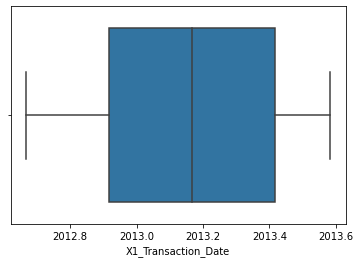

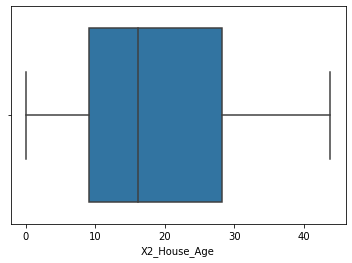

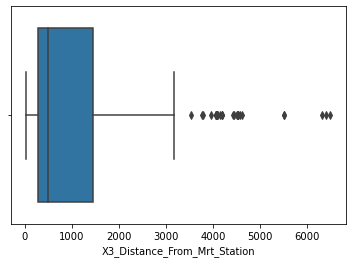

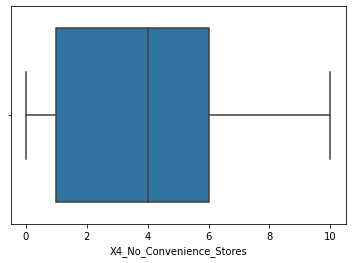

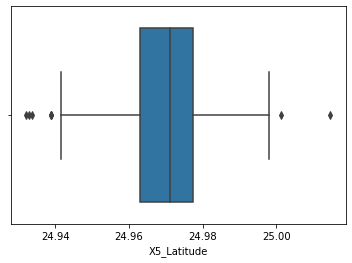

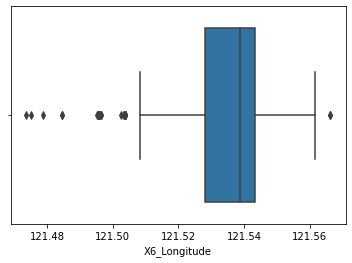

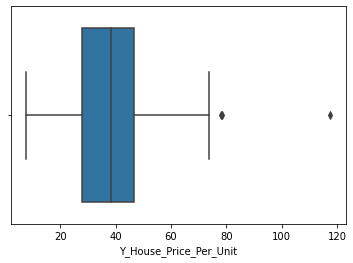

In [12]:
for i in dataset.columns:
    sns.boxplot(x=dataset[i])
    plt.show()

In [13]:
def detect_outliers(variable):
    var_mean=dataset[variable].mean()
    var_std=dataset[variable].std()
    cond=abs(dataset[variable]) > abs((3*var_std)+var_mean)
    return dataset[cond]

In [14]:
for i in ['X3_Distance_From_Mrt_Station','Y_House_Price_Per_Unit']:
    print(i)
    print(detect_outliers(i),end="\n\n")

X3_Distance_From_Mrt_Station
     X1_Transaction_Date  X2_House_Age  X3_Distance_From_Mrt_Station  \
No                                                                     
9               2013.500          31.7                      5512.038   
117             2013.000          30.9                      6396.283   
250             2012.833          18.0                      6306.153   
256             2013.417          31.5                      5512.038   
348             2013.583          17.4                      6488.021   

     X4_No_Convenience_Stores  X5_Latitude  X6_Longitude  \
No                                                         
9                           1     24.95095     121.48458   
117                         1     24.94375     121.47883   
250                         1     24.95743     121.47516   
256                         1     24.95095     121.48458   
348                         1     24.95719     121.47353   

     Y_House_Price_Per_Unit  
No             

In [15]:
dataset.drop(index=271,inplace=True)

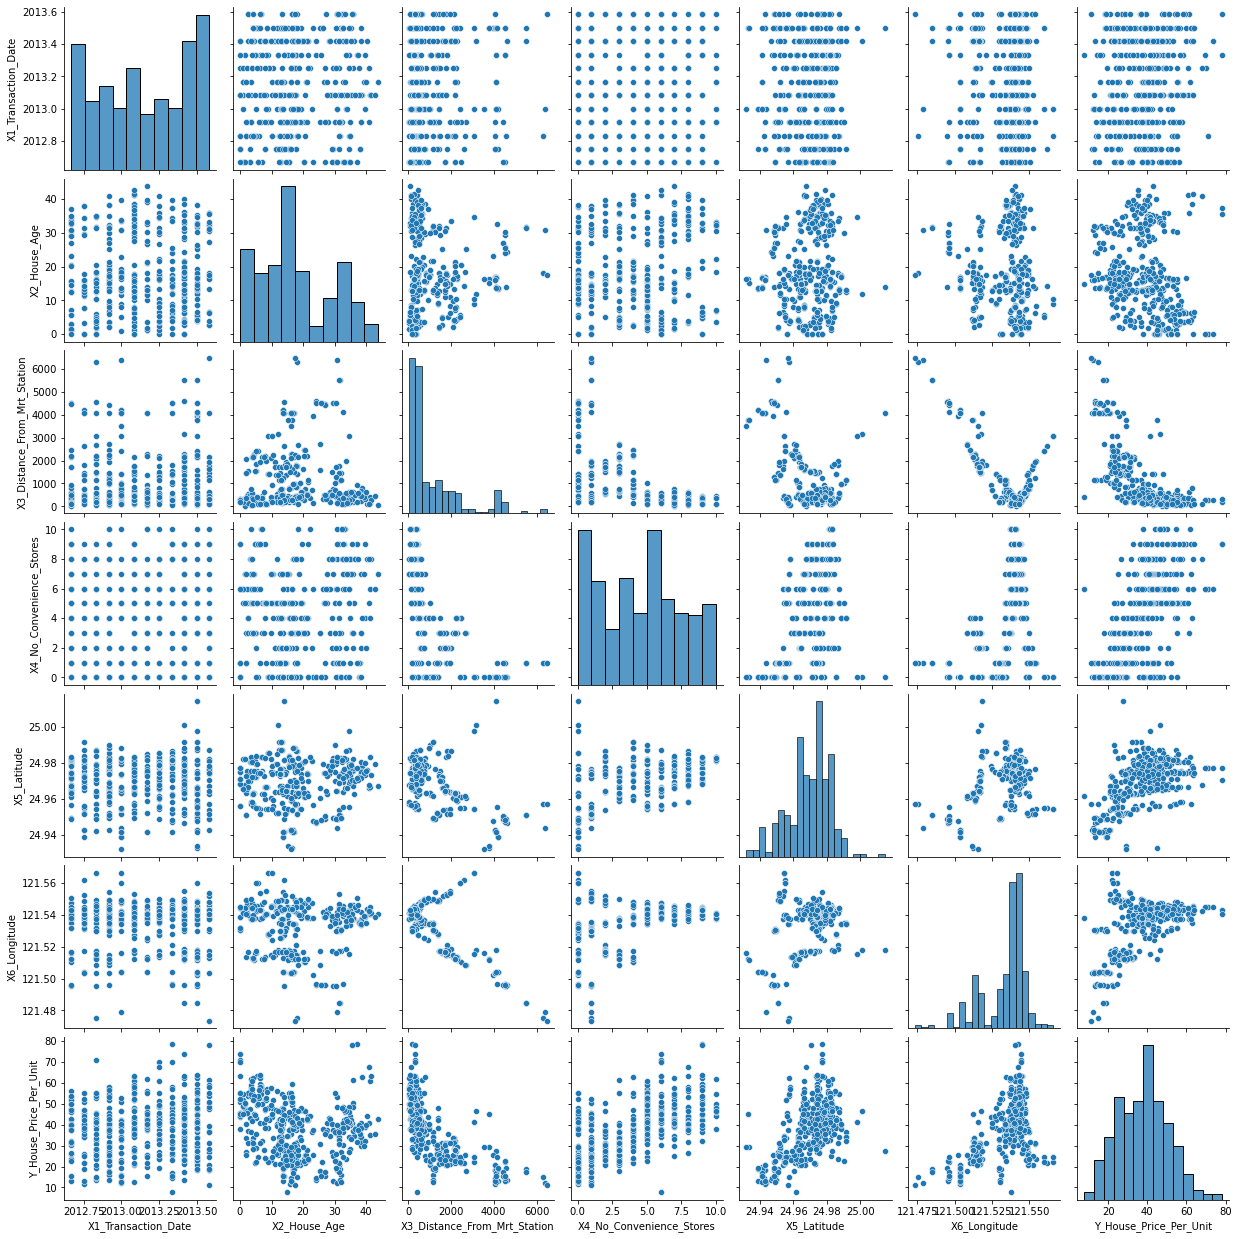

In [16]:
sns.pairplot(data=dataset)

<AxesSubplot:>

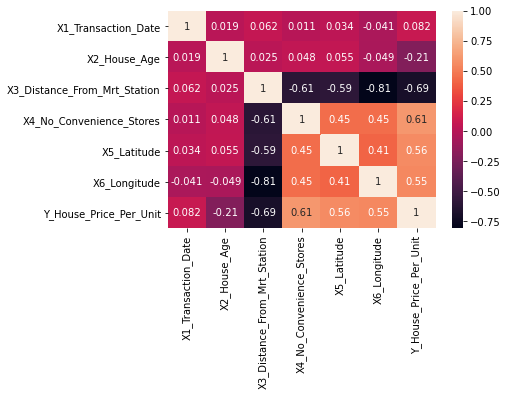

In [17]:
sns.heatmap(data=dataset.corr(),annot=True)

<AxesSubplot:>

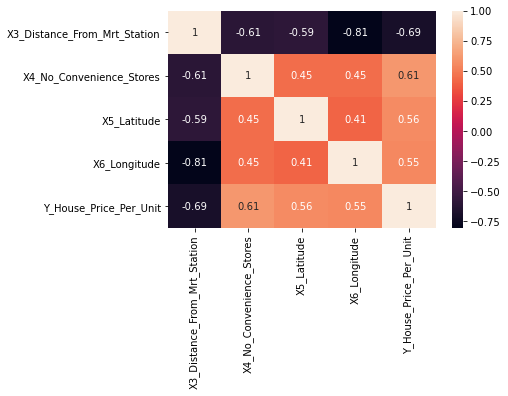

In [18]:
# Since X1 and X2 are not having enough corr with Y, We can simply remove them from our model
sns.heatmap(data=dataset.loc[:,'X3_Distance_From_Mrt_Station':].corr(),annot=True)

In [19]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [20]:
def data_preprocess(x,y,std_scale=False,min_max_scale=False):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
    
    if std_scale or min_max_scale:
        if std_scale:
            scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
        else:
            scaler = MinMaxScaler(copy=True,feature_range=(0,1))
        scaler.fit(x_train)
        # Now apply the transformations to the data:
        train_scaled = scaler.transform(x_train)
        test_scaled = scaler.transform(x_test)
        return(train_scaled, test_scaled, y_train, y_test)
    else:
        return(x_train, x_test, y_train, y_test)

# Model 1

In [21]:
x=dataset[['X2_House_Age','X3_Distance_From_Mrt_Station','X4_No_Convenience_Stores','X5_Latitude','X6_Longitude']]
y=dataset['Y_House_Price_Per_Unit']

In [22]:
calc_vif(x)

,variables,VIF
0,X2_House_Age,3.470633e+00
1,X3_Distance_From_Mrt_Station,2.984208e+00
2,X4_No_Convenience_Stores,4.771002e+00
3,X5_Latitude,5.904244e+06
4,X6_Longitude,5.903920e+06


In [23]:
x_train_scaled,x_test_scaled,y_train,y_test=data_preprocess(x,y)

In [24]:
reg=LinearRegression().fit(x_train_scaled,y_train)
print("Training score:",round(reg.score(x_train_scaled,y_train),3))
print("Testing score:",round(reg.score(x_test_scaled,y_test),3))

Training score: 0.598
Testing score: 0.67


In [25]:
pd.DataFrame({"Coefficient":reg.coef_},index=x.columns)

,Coefficient
X2_House_Age,-0.241694
X3_Distance_From_Mrt_Station,-0.003398
X4_No_Convenience_Stores,1.362875
X5_Latitude,226.876719
X6_Longitude,38.691963


In [26]:
y_pred=reg.predict(x_train_scaled)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

,Actual,Predicted
No,,
350,47.0,44.854164
209,26.2,31.207518
57,41.9,43.114515
9,18.8,9.499616
313,78.0,43.810172
...,...,...
325,31.3,32.668447
193,42.7,39.212604
118,13.0,14.978367


In [27]:
df['Error_Term']=df.Actual-df.Predicted
df

,Actual,Predicted,Error_Term
No,,,
350,47.0,44.854164,2.145836
209,26.2,31.207518,-5.007518
57,41.9,43.114515,-1.214515
9,18.8,9.499616,9.300384
313,78.0,43.810172,34.189828
...,...,...,...
325,31.3,32.668447,-1.368447
193,42.7,39.212604,3.487396
118,13.0,14.978367,-1.978367


/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error_Term', ylabel='Density'>

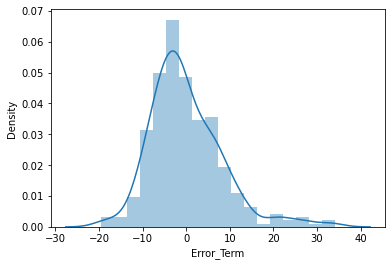

In [28]:
sns.distplot(df.Error_Term)

In [29]:
df.Error_Term.mean()

-6.381087675515462e-13

In [30]:
x_endog = sm.add_constant(x_train_scaled)
res = sm.OLS(y_train, x_endog).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Y_House_Price_Per_Unit   R-squared:                       0.598
Model:                                OLS   Adj. R-squared:                  0.591
Method:                     Least Squares   F-statistic:                     89.96
Date:                    Mon, 30 Nov 2020   Prob (F-statistic):           8.71e-58
Time:                            17:10:14   Log-Likelihood:                -1094.3
No. Observations:                     309   AIC:                             2201.
Df Residuals:                         303   BIC:                             2223.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.033e+04   6799.102     -1.519      0.130   -2.37e+04    3052.700
X2_House_Age                    -0.2417      0.043     -5.660      0.000      -0.326      -0.158
X3_Distance_From_Mrt_Station    -0.0034      0.001     -4.305      0.000      -0.005      -0.002
X4_No_Convenience_Stores         1.3629      0.213      6.393      0.000       0.943       1.782
X5_Latitude                    226.8767     47.163      4.810      0.000     134.067     319.686
X6_Longitude                    38.6920     54.032      0.716      0.474     -67.633     145.017
==============================================================================
Omnibus:                       64.694   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.465
Skew:                           1.095   Prob(JB):                     3.45e-28
Kurtosis:                       5.241   Cond. No.                     2.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 6.282249661122005
Mean Squared Error: 69.75470455139161
Root Mean Squared Error: 8.351928193620418


# Model 2

In [32]:
x=dataset[['X2_House_Age','X3_Distance_From_Mrt_Station','X4_No_Convenience_Stores']]
y=dataset['Y_House_Price_Per_Unit']

In [33]:
calc_vif(x)

,variables,VIF
0,X2_House_Age,2.776305
1,X3_Distance_From_Mrt_Station,1.525563
2,X4_No_Convenience_Stores,2.050247


In [34]:
x_train_scaled,x_test_scaled,y_train,y_test=data_preprocess(x,y)

In [35]:
reg=LinearRegression().fit(x_train_scaled,y_train)
print("Training score:",round(reg.score(x_train_scaled,y_train),3))
print("Testing score:",round(reg.score(x_test_scaled,y_test),3))

Training score: 0.567
Testing score: 0.637


In [36]:
pd.DataFrame({"Coefficient":reg.coef_},index=x.columns)

,Coefficient
X2_House_Age,-0.227618
X3_Distance_From_Mrt_Station,-0.004992
X4_No_Convenience_Stores,1.446586


In [37]:
y_pred=reg.predict(x_train_scaled)
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred})
df

,Actual,Predicted
No,,
350,47.0,46.656262
209,26.2,33.760990
57,41.9,43.793388
9,18.8,8.436372
313,78.0,45.093448
...,...,...
325,31.3,33.243036
193,42.7,41.590926
118,13.0,17.672740


In [38]:
df['Error_Term']=df.Actual-df.Predicted
df

,Actual,Predicted,Error_Term
No,,,
350,47.0,46.656262,0.343738
209,26.2,33.760990,-7.560990
57,41.9,43.793388,-1.893388
9,18.8,8.436372,10.363628
313,78.0,45.093448,32.906552
...,...,...,...
325,31.3,33.243036,-1.943036
193,42.7,41.590926,1.109074
118,13.0,17.672740,-4.672740


/home/prashanth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error_Term', ylabel='Density'>

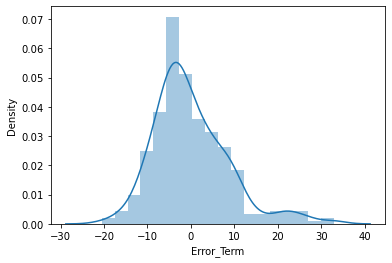

In [39]:
sns.distplot(df.Error_Term)

In [40]:
df.Error_Term.mean()

1.6786284695950587e-15

In [41]:
x_endog = sm.add_constant(x_train_scaled)
res = sm.OLS(y_train, x_endog).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Y_House_Price_Per_Unit   R-squared:                       0.567
Model:                                OLS   Adj. R-squared:                  0.562
Method:                     Least Squares   F-statistic:                     133.0
Date:                    Mon, 30 Nov 2020   Prob (F-statistic):           4.26e-55
Time:                            17:13:00   Log-Likelihood:                -1105.7
No. Observations:                     309   AIC:                             2219.
Df Residuals:                         305   BIC:                             2234.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           41.7220      1.528     27.300      0.000      38.715      44.729
X2_House_Age                    -0.2276      0.044     -5.190      0.000      -0.314      -0.141
X3_Distance_From_Mrt_Station    -0.0050      0.001     -9.959      0.000      -0.006      -0.004
X4_No_Convenience_Stores         1.4466      0.219      6.604      0.000       1.016       1.878
==============================================================================
Omnibus:                       54.379   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.763
Skew:                           1.018   Prob(JB):                     5.31e-20
Kurtosis:                       4.657   Cond. No.                     5.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 6.593863156337518
Mean Squared Error: 75.08983934181231
Root Mean Squared Error: 8.665439362306582


In [43]:
from sklearn.metrics import r2_score
r2_score(y_true=df.Actual,y_pred=df.Predicted)

0.5667275334852565